# Assignment Code: DA-AG-009
# EDA | Assignment

In [4]:
# 1. Read the Bike Details dataset into a Pandas DataFrame and display its first 10 rows.
# (Show the shape and column names as well.)

import pandas as pd

# Load the dataset
df = pd.read_csv('BIKE DETAILS.csv')

# Display first 10 rows
print("First 10 rows of dataset:")
print(df.head(10))

# Show the shape
print('\n Shape of dataset:')
print(df.shape)

# Show the column names
print('\n Coulumn names:')
print(df.columns.tolist())

First 10 rows of dataset:
                                   name  selling_price  year seller_type  \
0             Royal Enfield Classic 350         175000  2019  Individual   
1                             Honda Dio          45000  2017  Individual   
2   Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3     Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                 Yamaha SZ [2013-2014]          20000  2011  Individual   
5                      Honda CB Twister          18000  2010  Individual   
6                  Honda CB Hornet 160R          78500  2018  Individual   
7  Royal Enfield Bullet 350 [2007-2011]         180000  2008  Individual   
8                Hero Honda CBZ extreme          30000  2010  Individual   
9                    Bajaj Discover 125          50000  2016  Individual   

       owner  km_driven  ex_showroom_price  
0  1st owner        350                NaN  
1  1st owner       5650                NaN  
2 

In [5]:
# 2. Check for missing values in all columns and describe your approach for handling them.

# Check (missing values)
missing = df.isnull().sum()
print("Missing Values: \n", missing)

# Approaches:
# Dropping columns or rows with too many missing values
# Numerical columns fill with median or mean if only a few missing
# Categorical columns fill with mode or create "unknown" category
# More advanced imputation if needed

Missing Values: 
 name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64


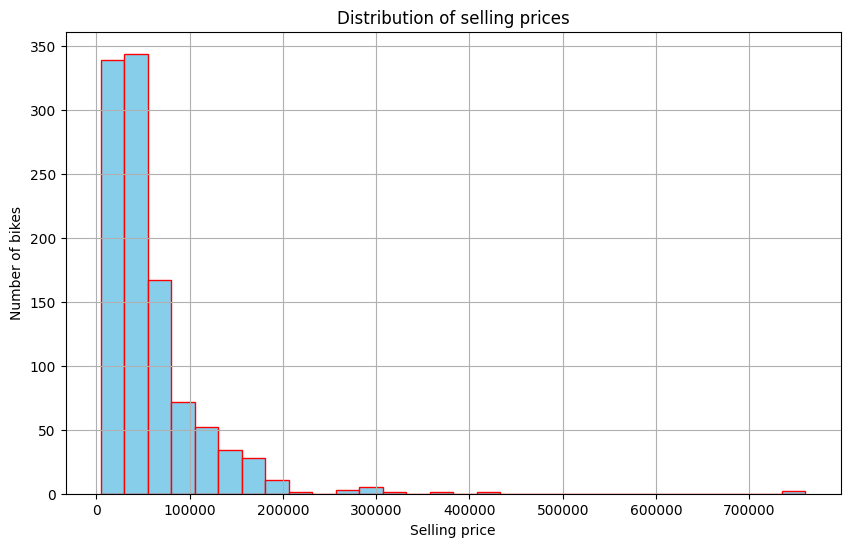

In [11]:
# 3. Plot the distribution of selling prices using a histogram and describe the overall trend.

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.hist(df['selling_price'], bins=30, color='skyblue', edgecolor='red')
plt.title('Distribution of selling prices')
plt.xlabel('Selling price')
plt.ylabel('Number of bikes')
plt.grid(True)
plt.show()

# Interpretation:
# The selling price distribution is right-skewed, with most bikes priced between ₹20,000 and ₹80,000, peaking below ₹50,000.
# A long tail beyond ₹1,00,000 indicates a few premium bikes, with very few priced above ₹3,00,000.

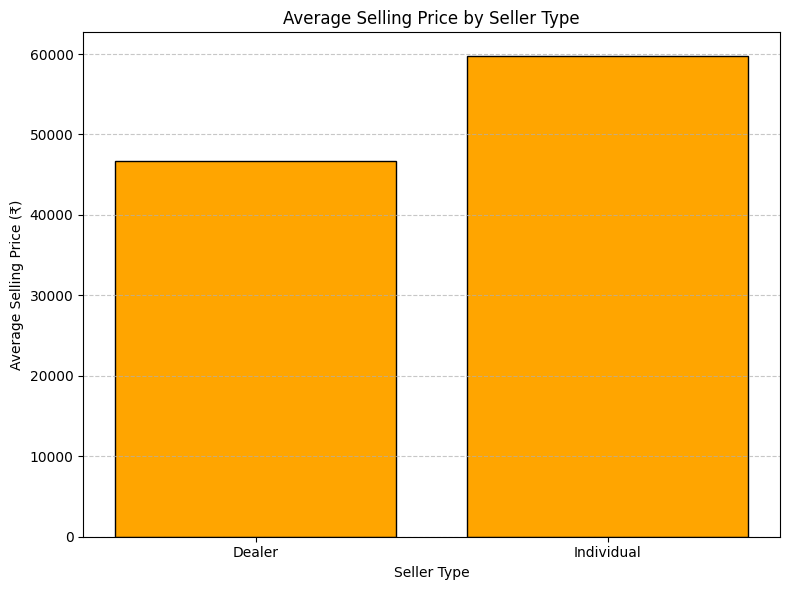

In [22]:
# 4. Create a bar plot to visualize the average selling price for each seller_type and write one observation.

import pandas as pd
import matplotlib.pyplot as plt

# Group by seller_type and calculate mean selling price
avg_price = df.groupby('seller_type')['selling_price'].mean().reset_index()

# Bar plot
plt.figure(figsize=(8, 6))
plt.bar(avg_price['seller_type'], avg_price['selling_price'], color='orange', edgecolor='black')
plt.title('Average Selling Price by Seller Type')
plt.xlabel('Seller Type')
plt.ylabel('Average Selling Price (₹)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Observation: Individual sellers tend to have a higher average selling price compared to dealers and trust sellers,
# possibly because they list better-maintained or newer bikes

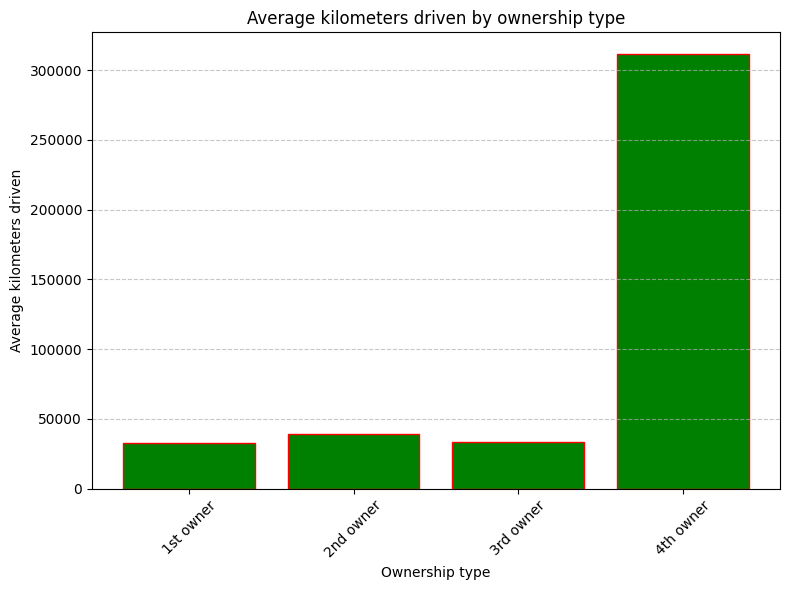

In [25]:
# 5. Compute the average km_driven for each ownership type (1st owner, 2nd owner, etc.), and present the result as a bar plot.
import matplotlib.pyplot as plt

# Group by owner and calculate average km_driven
avg_km = df.groupby('owner')['km_driven'].mean().reset_index()

# Bar plot
plt.figure(figsize=(8, 6))
plt.bar(avg_km['owner'], avg_km['km_driven'], color='green', edgecolor='red')
plt.title("Average kilometers driven by ownership type")
plt.xlabel('Ownership type')
plt.ylabel('Average kilometers driven')
plt.xticks(rotation=45)
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
plt.tight_layout()
plt.show()

# Insights - 1st owner bikes generally have lower mileage
# 2nd, 3rd, and 4th & above owner bikes tend to have higher average km_driven suggesting more usage over multiple ownerships

In [29]:
# 6. Use the IQR method to detect and remove outliers from the km_driven column. Show before-and-after summary statistics.

# Calculate IQR
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

# Lower and Upper bounds
lower_bound = Q1 - 1.5 *IQR
upper_bound = Q3 + 1.5 *IQR

# Show before-removal statistics
print("Before Removing Outliers: ")
print(df['km_driven'].describe())

# Remove outliers
no_outliers = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]

# Show after-removal statistics
print("\n After Removing Outliers: ")
print(no_outliers['km_driven'].describe())

Before Removing Outliers: 
count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64

 After Removing Outliers: 
count     1022.000000
mean     28203.415851
std      19552.083583
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      86000.000000
Name: km_driven, dtype: float64


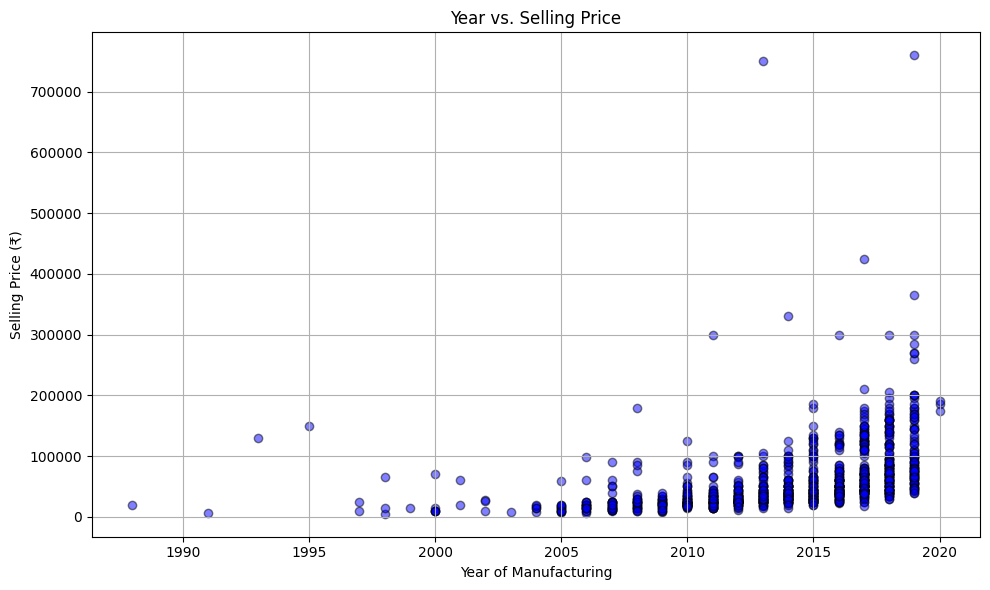

In [37]:
# 7. Create a scatter plot of year vs. selling_price to explore the relationship between a bike's age and its price.

import matplotlib.pyplot as plt

# Scatter plot
plt.figure(figsize=(10,6))
plt.scatter(df['year'],df['selling_price'], alpha=0.5, color = 'blue', edgecolor = 'black')
plt.title("Year vs. Selling Price")
plt.xlabel("Year of Manufacturing")
plt.ylabel("Selling Price (₹)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [48]:
# 8. Convert the seller_type column into numeric format using one-hot encoding. Display the first 5 rows of the resulting DataFrame.

# One-hot encode the seller_type column
encoded_seller_type = pd.get_dummies(df, columns=['seller_type'], prefix='seller_type')

# Display first 5 rows
encoded_seller_type.head(5)

,name,selling_price,year,owner,km_driven,ex_showroom_price,seller_type_Dealer,seller_type_Individual
0,Royal Enfield Classic 350,175000,2019,1st owner,350,NaN,False,True
1,Honda Dio,45000,2017,1st owner,5650,NaN,False,True
2,Royal Enfield Classic Gunmetal Grey,150000,2018,1st owner,12000,148114.0,False,True
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,1st owner,23000,89643.0,False,True
4,Yamaha SZ [2013-2014],20000,2011,2nd owner,21000,NaN,False,True


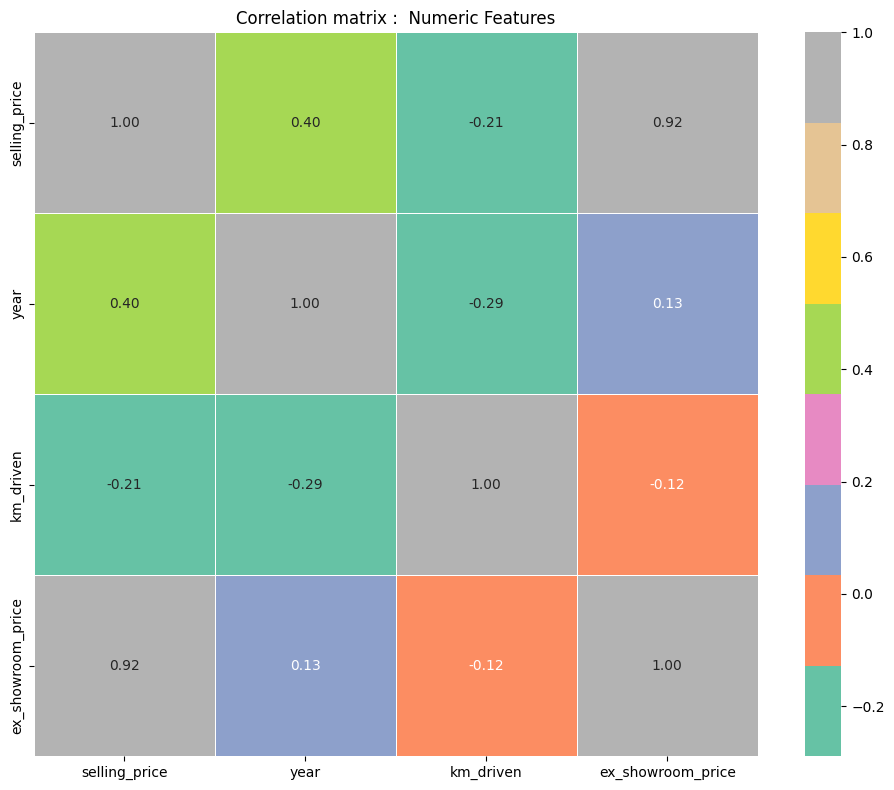

In [57]:
# 9. Generate a heatmap of the correlation matrix for all numeric columns. What correlations stand out the most?

import seaborn as sns
import matplotlib.pyplot as plt

# Numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='Set2', square=True, linewidths=0.5)
plt.title("Correlation matrix :  Numeric Features")
plt.tight_layout()
plt.show()

# Showroom price and year are the strongest predictors of selling price,
# while km driven has a weaker but still relevant negative impact

10. Summarize your findings in a brief report:
*   What are the most important factors affecting a bike's selling price?
*   Mention any data cleaning or feature engineering you performed.
- Key Factors influencing Selling Price -
  - Ex-showroom price is the strongest predictor (0.92 correlation)
  - Newer bikes (higher year) sell for more
  - Higher km driven slightly reduces price
  - 1st owner and individual sellers tend to get better prices

- Data Cleaning & Feature Engineering -
  -  Handled missing values using median and mode.
  -  Removed outliers in km driven using IQR method
  -  Applied one-hot encoding to seller_type
  -  Used plots and correlation analysis to explore patterns